<a href="https://colab.research.google.com/github/JiyuanLyu/JiyuanLyu.github.io/blob/master/blog_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this post, I'll teach a machine learning algorithm to distinguish between pictures of dogs and pictures of cats. I'll use new skills and concepts related to image classfication in **Tensorflow**. 

# 1. Load Packages and Obtain Data

### Load Datasets

First of all, make a code block in which I'll hold my `import` statements. This code block will be updated in the following steps.

In [7]:
import os
from tensorflow.keras import utils
import tensorflow as tf
import matplotlib.pyplot as plt


Then, access the data. I'll use a sample dataset from the TensorFlow team that contains labeles images of cats and dogs.

In this case, I'll use a special-purpose `keras` utility called `image_dataset_from_directory` to construct a dataset. The argumnets are:

1. The first and the most important argument is the first one, which says **where** the images are located.
2. `shuffle`, says that when retrieving data from this directory, the order should be randomized.
3. `batch_size`, determines how many data points are gathered from the directory at once.
4. `image_size`, specifies the size of the input images.

The code shown below are provided by Prof. Chodrow. 

In [5]:
# location of data
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# download the data and extract it
path_to_zip = utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

# construct paths
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

# parameters for datasets
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

# construct train and validation datasets 
train_dataset = utils.image_dataset_from_directory(train_dir,
                                                   shuffle=True,
                                                   batch_size=BATCH_SIZE,
                                                   image_size=IMG_SIZE)

validation_dataset = utils.image_dataset_from_directory(validation_dir,
                                                        shuffle=True,
                                                        batch_size=BATCH_SIZE,
                                                        image_size=IMG_SIZE)

# construct the test dataset by taking every 5th observation out of the validation dataset
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Awesome! Now we have created TensorFlow datasets for training, validation and testing.

Then we need to read data rapidly. The code is shown below, provided by Prof. Chodrow.

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

### Working with Datasets

Now let's briefly explore our dataset. I'll write a function to create a two-row visualization:

1. In the first row, show three random pictures of cats.
2. In the second row, show three random pictures of dogs.

In [10]:
def two_row_visualization():
  # Decide the size of the pictures
  plt.figure(figsize = (12, 12))
  for images, labels in train_dataset.take(1):
    for i in range(3):
      # Display the cat pics in the first row
      ax = plt.subplot(3, 3, i+1)
      plt.imshow(images[labels == 0][i].numpy().astype("uint8"))
      plt.title('Cat')
      plt.axis("off")
      # Display the dog pics in the second row
      ax = plt.subplot(3, 3, i+4)
      plt.imshow(images[labels == 1][i].numpy().astype("uint8"))
      plt.title('Dog')
      plt.axis("off")


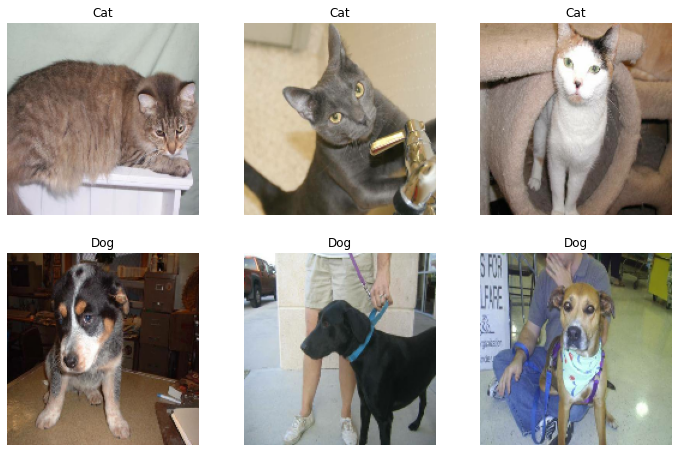

In [11]:
two_row_visualization()

The pictures looks great! 

### Check Label Frequencies

In the next step, I'll use a line of code provided by Prof. Chodrow to create an iterator called `labels`.

In [12]:
labels_iterator= train_dataset.unbatch().map(lambda image, label: label).as_numpy_iterator()

Compute the number of images in the training data with label `0` (corresponding to `"cat"`) and label `1` (corresponding to `"dog"`).